In [1]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/avocado.csv")


## mapping function a column
df['Date'] = pd.to_datetime(df["Date"])

albany_df = df[df["region"]=="Albany"]
albany_df.set_index("Date", inplace=True)
albany_df["AveragePrice"].plot()
plt.show(albany_df.plot())

plt.show(albany_df['AveragePrice'].rolling(25).mean().plot())
## this graph is busy - we'll clean up with a sort and a moving average


## let's make sure the dates are in proper order
albany_df.sort_index(inplace=True)
plt.show(albany_df['AveragePrice'].rolling(25).mean().plot())

## let's make this transformation a column in the dataframe
#albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

albany_df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()
albany_df.head(3)
albany_df.dropna().head(3)

# display all regions on one graph
df.values

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

/Users/George1/Downloads/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 640x480 with 1 Axes>

array([[0, Timestamp('2015-12-27 00:00:00'), 1.33, ..., 'conventional',
        2015, 'Albany'],
       [1, Timestamp('2015-12-20 00:00:00'), 1.35, ..., 'conventional',
        2015, 'Albany'],
       [2, Timestamp('2015-12-13 00:00:00'), 0.93, ..., 'conventional',
        2015, 'Albany'],
       ...,
       [9, Timestamp('2018-01-21 00:00:00'), 1.87, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [10, Timestamp('2018-01-14 00:00:00'), 1.93, ..., 'organic', 2018,
        'WestTexNewMexico'],
       [11, Timestamp('2018-01-07 00:00:00'), 1.62, ..., 'organic', 2018,
        'WestTexNewMexico']], dtype=object)

In [5]:
## finding all regions
list(set(df['region'].values.tolist()))

['LasVegas',
 'HarrisburgScranton',
 'Boston',
 'Houston',
 'Philadelphia',
 'NewYork',
 'Louisville',
 'TotalUS',
 'Tampa',
 'Sacramento',
 'Denver',
 'West',
 'HartfordSpringfield',
 'Albany',
 'BuffaloRochester',
 'Charlotte',
 'CincinnatiDayton',
 'Nashville',
 'Northeast',
 'Seattle',
 'SouthCarolina',
 'Chicago',
 'StLouis',
 'Atlanta',
 'Boise',
 'GrandRapids',
 'Midsouth',
 'Columbus',
 'WestTexNewMexico',
 'Spokane',
 'Detroit',
 'Jacksonville',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'Southeast',
 'Indianapolis',
 'BaltimoreWashington',
 'NorthernNewEngland',
 'MiamiFtLauderdale',
 'DallasFtWorth',
 'SanDiego',
 'LosAngeles',
 'PhoenixTucson',
 'SanFrancisco',
 'NewOrleansMobile',
 'RichmondNorfolk',
 'California',
 'Orlando',
 'Pittsburgh',
 'Roanoke',
 'Syracuse',
 'GreatLakes',
 'SouthCentral']

In [6]:
## finding all regions the simpler way
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
# make column headers regions, and values of columns are 25 moving average and index is date
## this is restructuring by iterating over regions
graph_df = pd.DataFrame()
for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_ price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_ price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_ price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [10]:
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [11]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
graph_df.tail()

,Albany_ price25ma,Atlanta_ price25ma,BaltimoreWashington_ price25ma,Boise_ price25ma,Boston_ price25ma,BuffaloRochester_ price25ma,California_ price25ma,Charlotte_ price25ma,Chicago_ price25ma,CincinnatiDayton_ price25ma,Columbus_ price25ma,DallasFtWorth_ price25ma,Denver_ price25ma,Detroit_ price25ma,GrandRapids_ price25ma,GreatLakes_ price25ma
Date,,,,,,,,,,,,,,,,
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1492,1.3264,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2788


In [16]:
import pandas as pd


df = pd.read_csv("datasets/avocado.csv")

df = df.copy()[df['type']=="organic"]
df['Date'] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)

graph_df = pd.DataFrame()
for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index("Date", inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_ price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_ price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_ price25ma'])
        
graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_ price25ma,LasVegas_ price25ma,PhoenixTucson_ price25ma,BuffaloRochester_ price25ma,Spokane_ price25ma,LosAngeles_ price25ma,Philadelphia_ price25ma,Boston_ price25ma,StLouis_ price25ma,Louisville_ price25ma,...,Houston_ price25ma,Chicago_ price25ma,Plains_ price25ma,Indianapolis_ price25ma,SouthCentral_ price25ma,Columbus_ price25ma,Albany_ price25ma,Detroit_ price25ma,NewOrleansMobile_ price25ma,NewYork_ price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


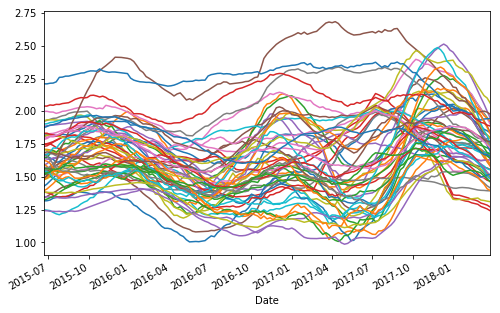

In [19]:
graph_df.dropna().plot(figsize=(8,5), legend=False)